In [138]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [79]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA  

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score

In [3]:
data = load_iris()

In [5]:
data_arr = data["data"]
data_out= data["target"]
data_col= data['target_names']

In [6]:
data_col

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [84]:
a = PCA(n_components =2)
X = a.fit_transform(data_arr)
a.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [94]:
XX= data_arr[:,:2]

Text(0.5, 1.0, 'Dim_Red')

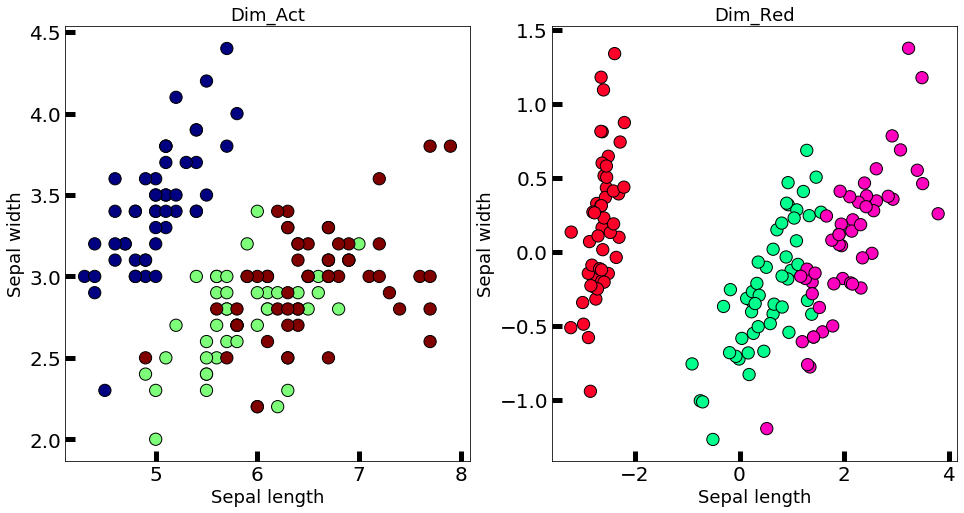

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(XX[:, 0], XX[:, 1], c=data_out, cmap='jet',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=data_out, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Dim_Act', fontsize=18)
axes[1].set_title('Dim_Red', fontsize=18)

For n_clusters = 2, calinski_harabasz_score score is 570.8388682305422, silhouette_score score is 0.7056703225102109, inertia_ score is 137.15530112818422)
For n_clusters = 3, calinski_harabasz_score score is 693.7084334188476, silhouette_score score is 0.5976764219547992, inertia_ score is 63.81994202200131)
For n_clusters = 4, calinski_harabasz_score score is 718.3740550643823, silhouette_score score is 0.5591106064519759, inertia_ score is 42.26643460946299)
For n_clusters = 5, calinski_harabasz_score score is 684.3004599585826, silhouette_score score is 0.5535698812209565, inertia_ score is 33.51398303646691)
For n_clusters = 6, calinski_harabasz_score score is 704.7353405899745, silhouette_score score is 0.4428041552990453, inertia_ score is 26.154949135807737)
For n_clusters = 7, calinski_harabasz_score score is 696.507003965029, silhouette_score score is 0.4335181949227466, inertia_ score is 22.040908240189083)
For n_clusters = 8, calinski_harabasz_score score is 718.39225111734

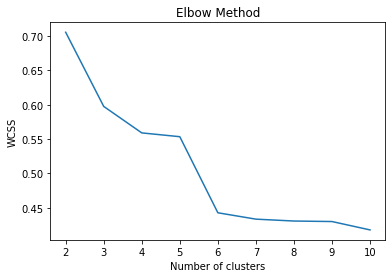

In [88]:
wcss = []
for i in range(2, 11):
    kmean = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmean.fit(X)
    #wcss.append(kmean.inertia_)
    preds = kmean.labels_
    inte = kmean.inertia_
    #centers = kmeans.cluster_centers_
    score = silhouette_score (X, preds, metric='euclidean')
    #print ("For n_clusters = {}, silhouette score is {})".format(i, score))
    score1 = calinski_harabasz_score (X, preds)
    print ("For n_clusters = {}, calinski_harabasz_score score is {}, \
silhouette_score score is {}, inertia_ score is {})".format(i, score1,score, inte))
    wcss.append(score)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [117]:
from sklearn.neighbors import NearestNeighbors

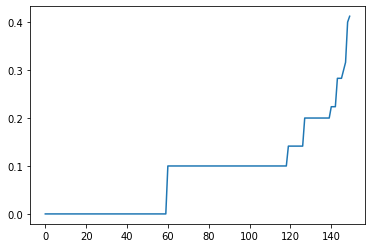

In [118]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(XX)
distances, indices = nbrs.kneighbors(XX)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [155]:
def graph(X,true_class,pred_class):
    score = silhouette_score (X, pred_class, metric='euclidean')
    print("silhouette_score",score)
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(X[:, 0], X[:, 1], c=true_class, cmap='gist_rainbow',
    edgecolor='k', s=150)
    axes[1].scatter(X[:, 0], X[:, 1], c=pred_class, cmap='jet',
    edgecolor='k', s=150)
    axes[0].set_xlabel('Sepal length', fontsize=18)
    axes[0].set_ylabel('Sepal width', fontsize=18)
    axes[1].set_xlabel('Sepal length', fontsize=18)
    axes[1].set_ylabel('Sepal width', fontsize=18)
    axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title("Predicted", fontsize=18)
    

silhouette_score 0.4450525692083638


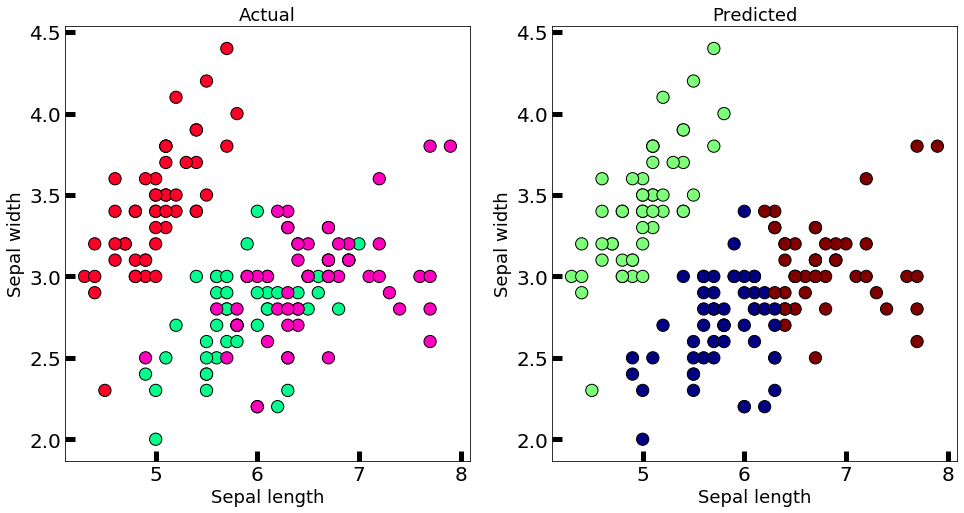

In [166]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
#km = DBSCAN(eps=.25, min_samples=2)
#km = MeanShift(bandwidth=.8)
km.fit(XX)
new_labels = km.labels_
graph(XX,data_out,new_labels)
# Plot the identified clusters and compare with the answers


In [ ]:
#km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km = DBSCAN(eps=.215, min_samples=4)
km.fit(XX)
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(XX[:, 0], XX[:, 1], c=data_out, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(XX[:, 0], XX[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Dim_Act', fontsize=18)
axes[1].set_title("Dim_Red", fontsize=18)
new_labels